In [8]:
import networkx as nx
import matplotlib.pyplot as plt

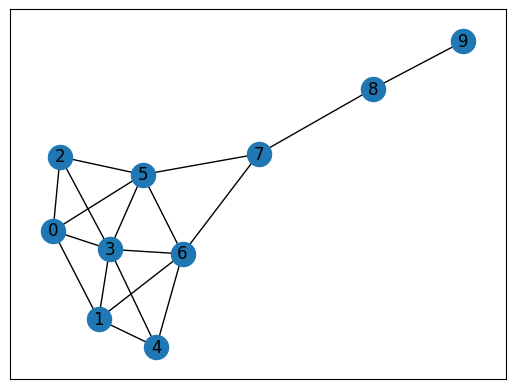

In [9]:
g = nx.krackhardt_kite_graph()
nx.draw_networkx(g)

In [13]:
g1 = nx.Graph()
g1.add_nodes_from(["Andre","Beverly","Ed","Carol","Diane","Fernando","Garth","Heather","Ike","Jane"])
g1.add_edges_from([("Andre","Beverly"),("Andre","Carol"),("Andre","Diane"),("Andre","Fernando"),
                  ("Beverly","Diane"),("Beverly","Ed"),("Beverly","Garth"),
                  ("Carol","Diane"),("Carol","Fernando"),
                  ("Diane","Ed"),("Diane","Fernando"),("Diane","Garth"),
                  ("Ed","Garth"),
                  ("Fernando","Garth"),("Fernando","Heather"),
                  ("Garth","Heather"),
                  ("Heather","Ike"),
                  ("Ike","Jane")])

As expected below Heather has the highest betweenness_centrality, which would mean she has the best overview of the overall picture of the network. Consequently Heather also has the ability to block communication from one end of the network, to the other end of the network. [cite: Krackhardt, David. “Assessing the Political Landscape: Structure, Cognition, and Power in Organizations”. Administrative Science Quarterly. 35 (2): 342–369. doi:10.2307/2393394. JSTOR 2393394. June 1990.]

{'Andre': 0.023148148148148143,
 'Beverly': 0.023148148148148143,
 'Ed': 0.0,
 'Carol': 0.0,
 'Diane': 0.10185185185185183,
 'Fernando': 0.23148148148148148,
 'Garth': 0.23148148148148148,
 'Heather': 0.38888888888888884,
 'Ike': 0.2222222222222222,
 'Jane': 0.0}

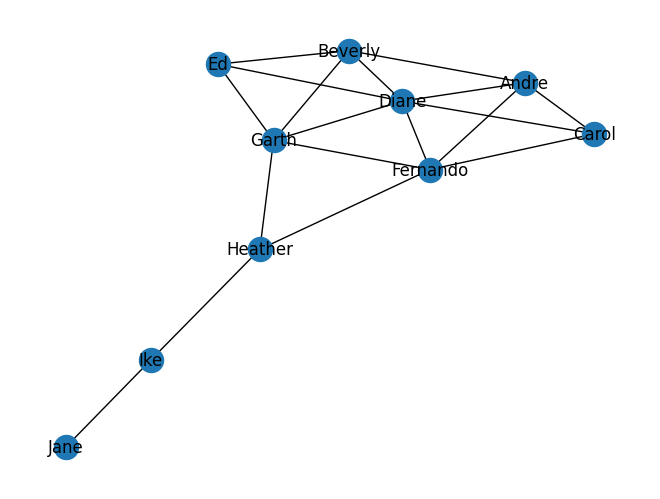

In [35]:
nx.draw(g1, with_labels=True)

nx.betweenness_centrality(g1, k=None, normalized=True, weight=None, endpoints=False, seed=None)

Show a variation of the graph above using PLOTLY. Here I have used the Google Colab example code and updated it to show the graph above in plotly.

In [33]:
import plotly.graph_objects as go
import networkx as nx

# Create a graph
G = g1
pos = nx.spring_layout(G)
nx.set_node_attributes(G, pos, 'pos')

# Add names to nodes (for demonstration purposes, using node index as name)
for node in G.nodes():
    G.nodes[node]['name'] = f'{node}'
    

# Create edge traces
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')


# Create node traces
node_x = []
node_y = []
node_text = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)
    node_text.append(G.nodes[node]['name'])

node_adjacencies = []
node_text = node_text
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))


node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    #mode='markers',
    hoverinfo='text',
    text=node_text,
    marker=dict(showscale=False, colorscale='YlGnBu', size=10, line_width=2))


node_trace.marker.color = node_adjacencies
node_trace.text = node_text



# Create figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title=dict(text='Kite Graph', font=dict(size=16)),
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    dragmode='lasso'  # Enable node dragging
                ))

# Show figure
fig.show()